<a href="https://colab.research.google.com/github/FIOWB21/Machine-learning/blob/main/%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 4. Заміна бінарних ознак на числові
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

# 1. Перевірка на пропущені значення
missing_values = df.isnull().sum()

# 3. Перевірка наявності дублікатів
duplicates = df.duplicated().sum()


print("Пропущені значення в кожній колонці:\n", missing_values)
print("\nКількість дублікатів:", duplicates)


Пропущені значення в кожній колонці:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Кількість дублікатів: 1


In [ ]:
# 3. Видалення дублікатів
df = df.drop_duplicates()

# 5. Виведення розміру таблиці та типу даних
table_size = df.shape
data_types = df.dtypes

print("Розмір таблиці:", table_size)
print("\nТипи даних:\n", data_types)

Розмір таблиці: (243, 7)

Типи даних:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [ ]:

print(df.head())

   total_bill   tip sex smoker day time  size
0       16.99  1.01   0      0   3    1     2
1       10.34  1.66   1      0   3    1     3
2       21.01  3.50   1      0   3    1     3
3       23.68  3.31   1      0   3    1     2
4       24.59  3.61   0      0   3    1     4


In [ ]:
# Перетворення категоріальних змінних на числові значення
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].astype('category').cat.codes

# Перевірка результату
print(df.dtypes)
df.head()

total_bill    float64
tip           float64
sex              int8
smoker           int8
day              int8
time             int8
size            int64
dtype: object
     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    1       1    3     1     2
1         10.34  1.66    0       1    3     1     3
2         21.01  3.50    0       1    3     1     3
3         23.68  3.31    0       1    3     1     2
4         24.59  3.61    1       1    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    0       1    2     1     3
240       27.18  2.00    1       0    2     1     2
241       22.67  2.00    0       0    2     1     2
242       17.82  1.75    0       1    2     1     2
243       18.78  3.00    1       1    0     1     2

[243 rows x 7 columns]


In [ ]:
# 2. Перевірка на пропущені значення
missing_values1 = df.isnull().sum()

# 3. Перевірка наявності дублікатів
duplicates1 = df.duplicated().sum()

# Виведення результатів
print("Пропущені значення в кожній колонці:\n", missing_values1)
print("\nКількість дублікатів:", duplicates1)

Пропущені значення в кожній колонці:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Кількість дублікатів: 0


In [ ]:
X = df.drop(columns=['tip'])
y = df['tip']

# 7. Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Поділ даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Побудова лінійної регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 9. Оцінка лінійної регресії
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [ ]:
# 9. Побудова Random Forest регресії
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# 9. Оцінка Random Forest регресії
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

Лінійна регресія: MSE = 1.169323788522593 , R2 = 0.5200756159874647
Random Forest регресія: MSE = 1.2144788108163262 , R2 = 0.5015426856972387


In [ ]:
# Обчислення кореляційної матриці
correlation_matrix = df.corr()

# Отримання кореляцій з 'tip'
tip_correlation = correlation_matrix['tip']

# Сортування кореляцій за спаданням
sorted_tip_correlation = tip_correlation.sort_values(ascending=False)

# Виведення результатів
print(sorted_tip_correlation)

tip           1.000000
total_bill    0.674998
size          0.488400
day           0.131798
time          0.117596
smoker       -0.009763
sex          -0.085274
Name: tip, dtype: float64


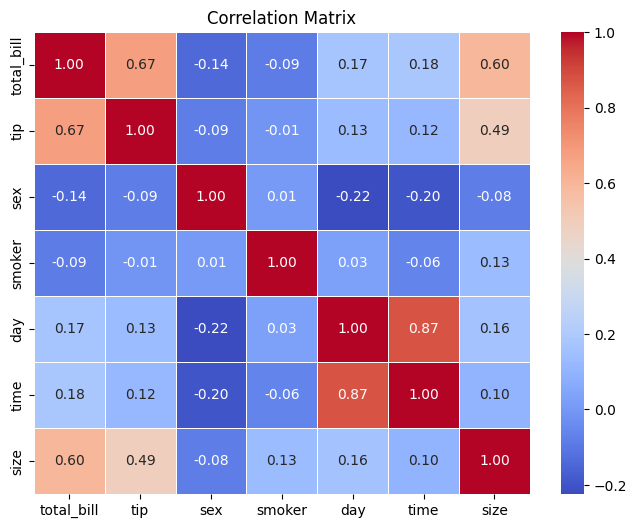

In [ ]:
import matplotlib.pyplot as plt
# Візуалізація теплової карти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Вибір ознак і цільової змінної
# Вибір ознак і цільової змінної
X = df[['total_bill', 'size', 'day', 'time']]  # Вибираємо тільки потрібні ознаки
y = df['tip']

#Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальну та тестову вибірки з використанням масштабованих даних
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Створення і навчання регресійної моделі
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model1.predict(X_test)

# Оцінка моделі
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

# Виведення результатів
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r21}")

# Результати прогнозування
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Розташування результатів за спаданням прогнозів
results = results.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results)

Mean Squared Error: 1.150752057079867
R^2 Score: 0.5276979930058592

Sorted Results:
     Actual  Predicted
170   10.00   6.105748
112    4.00   4.834411
180    3.68   4.493126
175    3.11   4.318492
237    1.17   4.311506
167    4.50   4.199740
210    2.00   4.035085
155    5.14   4.014129
239    5.92   3.932301
216    3.00   3.844485
96     4.00   3.757667
73     5.00   3.558085
113    2.55   3.425363
241    2.00   3.297630
15     3.92   3.188858
33     2.45   3.100044
185    5.00   3.100044
19     3.35   3.096053
60     3.21   3.060128
24     3.18   3.013226
38     2.31   2.900462
45     3.00   2.860546
108    3.76   2.855556
25     2.34   2.812646
164    3.00   2.782709
152    2.74   2.757761
18     3.50   2.728822
66     2.47   2.676931
93     4.30   2.663958
9      3.23   2.510280
127    2.00   2.484334
137    2.00   2.447411
150    2.50   2.439428
228    2.72   2.360593
161    2.50   2.298723
233    1.47   2.110118
117    1.50   2.098143
75     1.25   2.084172
196    2.00   2.06

Висновок:

У ході аналізу даних було проведено підготовку датасету для подальшого моделювання. Було перевірено та усунено пропуски, видалено дублікати, а також проведено кодування бінарних ознак, що забезпечило коректність та повноту даних. Аналіз кореляції між фізіологічними змінними та прогресом діабету дозволив виявити найбільш впливові фактори, що можуть бути корисними для прогнозування.

Моделювання за допомогою лінійної регресії та RandomForest регресії показало, що обидва підходи можуть бути ефективними для прогнозування прогресу діабету, з певною перевагою RandomForest у врахуванні нелінійних взаємозв’язків між змінними. Підсумовуючи, отримані результати показують, що правильна підготовка та аналіз даних є критичними етапами для побудови точних моделей прогнозування медичних показників, таких як прогрес діабету.